In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd /content/drive/MyDrive/indian_building_dataset

/content/drive/MyDrive/indian_building_dataset


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 140MB/s]
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [7]:
!ls runs/detect/train/

args.yaml					    P_curve.png		train_batch151.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch152.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1711552109.a40ecc51b986.2205.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch150.jpg	weights


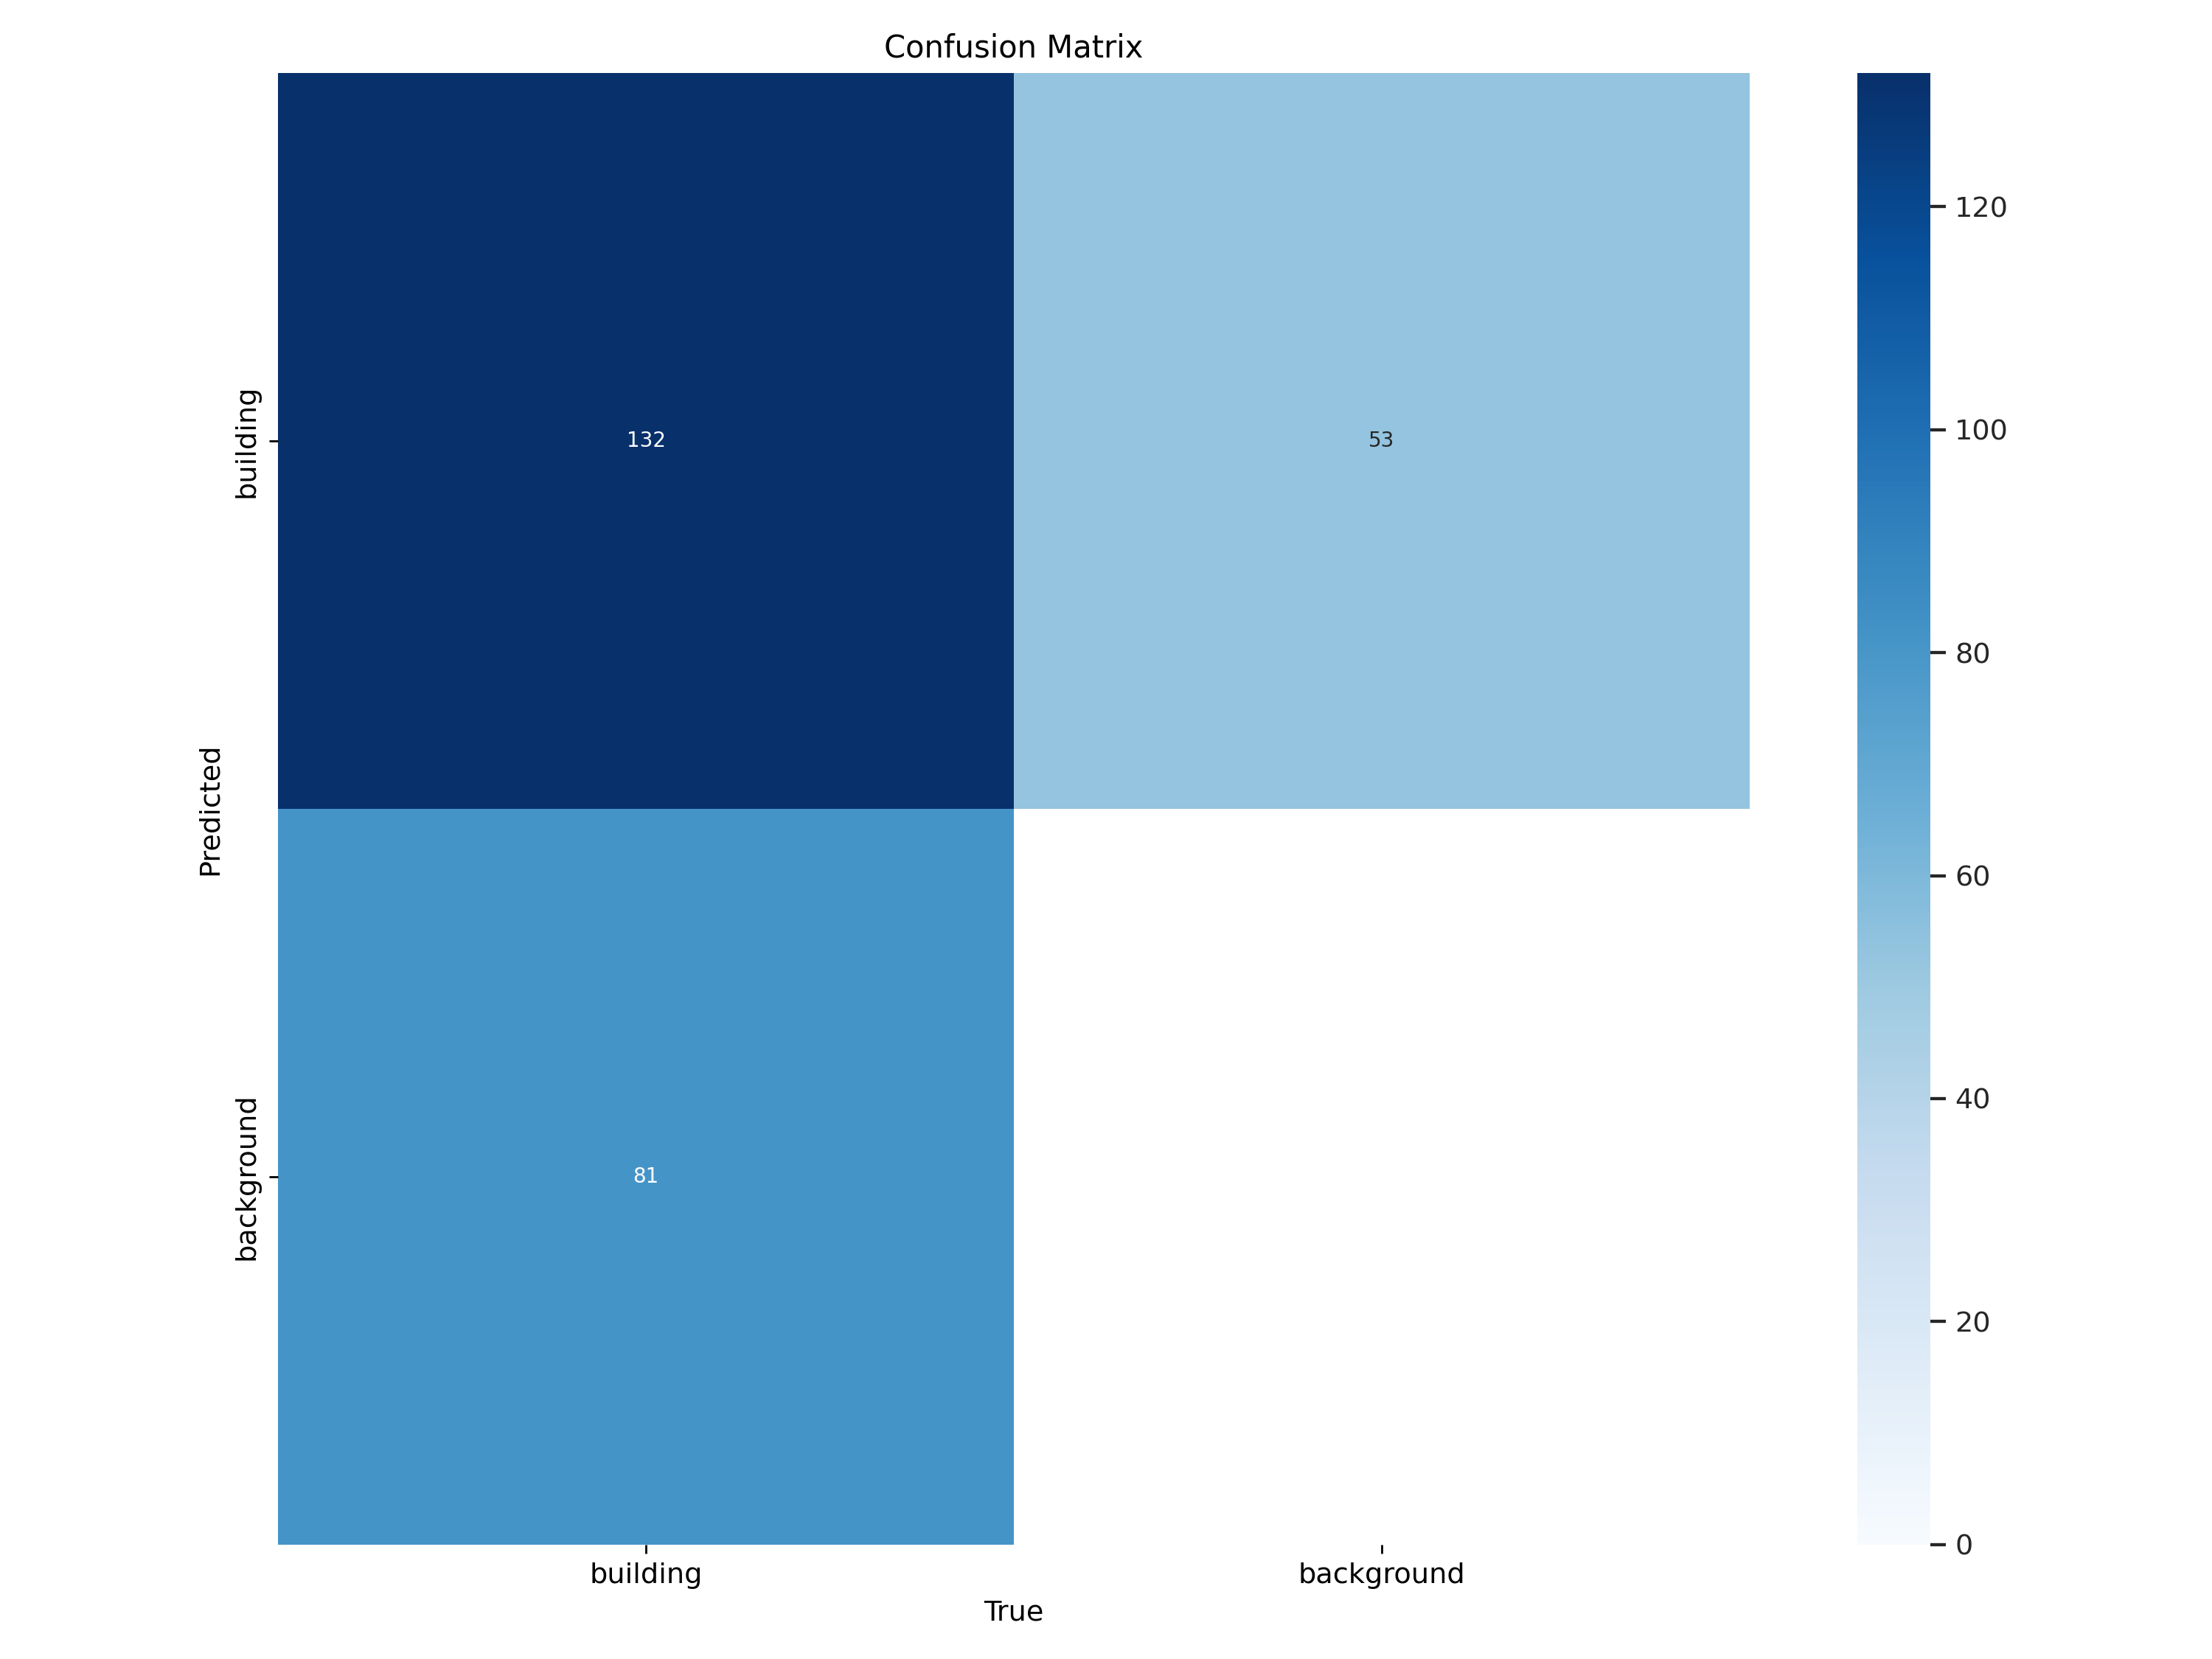

In [8]:
Image(filename='/content/drive/MyDrive/indian_building_dataset/runs/detect/train/confusion_matrix.png', width=600)

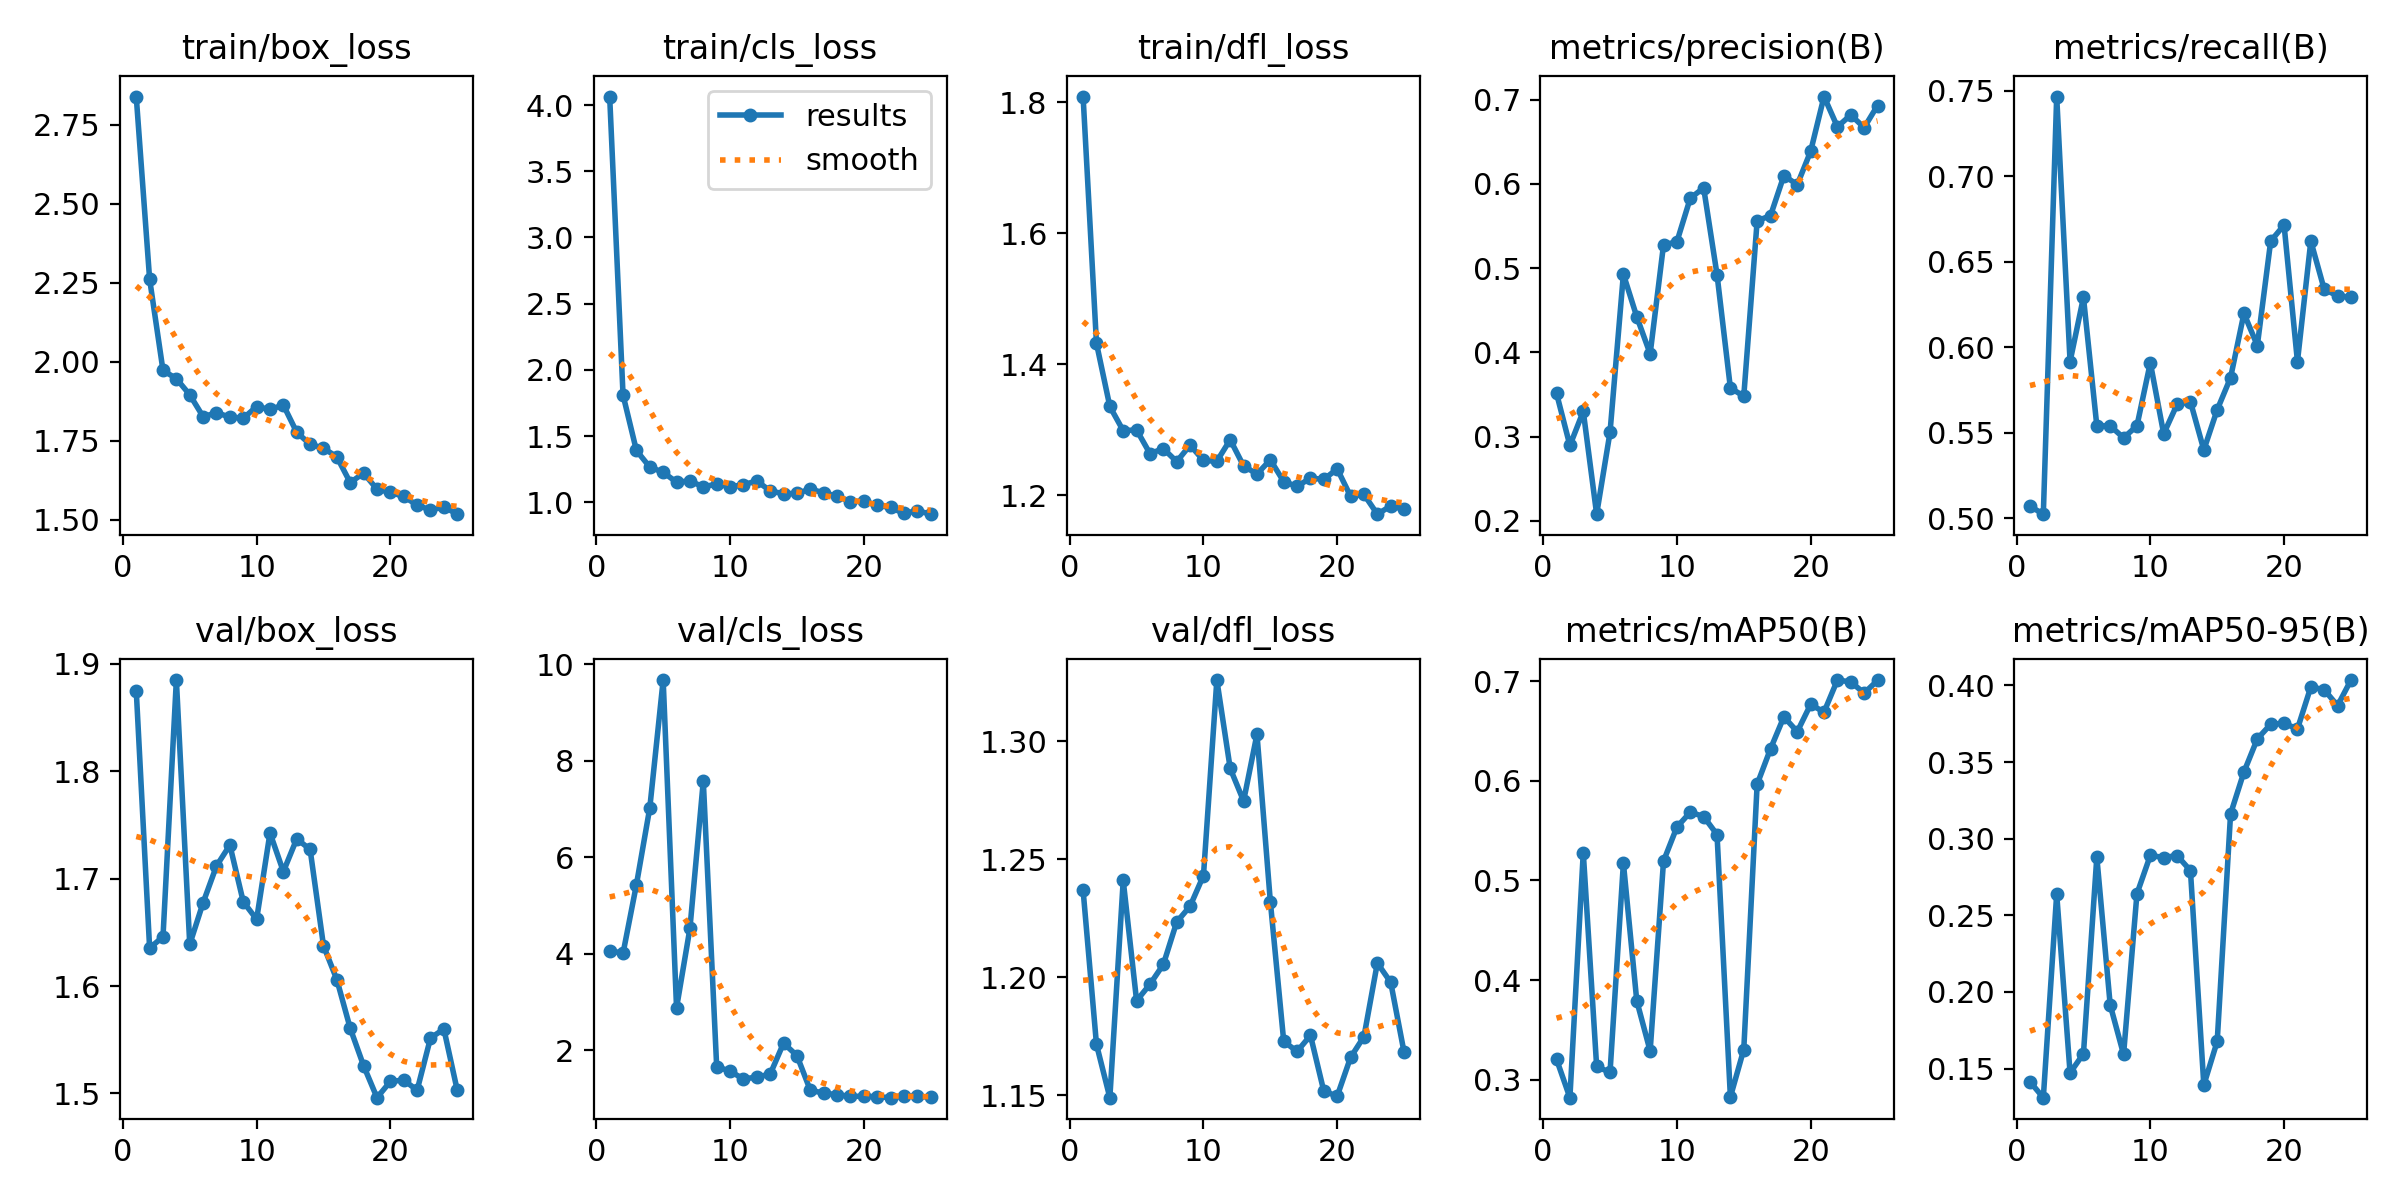

In [9]:
Image(filename='/content/drive/MyDrive/indian_building_dataset/runs/detect/train/results.png', width=600)

In [18]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/indian_building_dataset/runs/detect/train/weights/best.pt conf=0.25 source=/content/map2.jpg

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/map2.jpg: 224x224 82 buildings, 23.6ms
Speed: 1.3ms preprocess, 23.6ms inference, 880.8ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


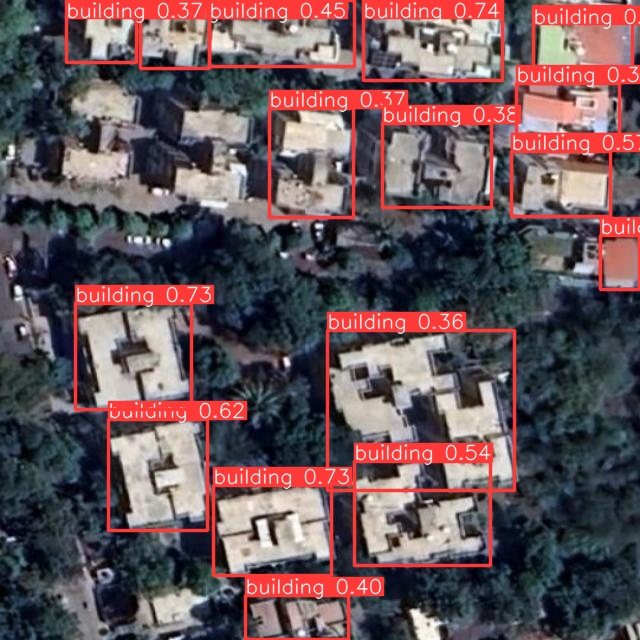

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/indian_building_dataset/runs/detect/predict/WhatsApp-Image-2024-02-15-at-12-49-06_58ea2f40_jpg.rf.5db5d62d4b866d64907da6124cfb4b84.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")